<p style="font-family: Arial; font-size:1.75em;color:Red; font-style:bold">
Mini Project on Investigating the Impact of Agriculture & Industry on Indian Economy</p>
<br>
<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Dataset: World Development Indicators</p>
<br>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Importing Libraries</p>




In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Using Pandas to Read the Dataset<br>
</p>
<br>
<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">

Using the *read_csv* function in pandas, we will ingest the Indicators file.</p>

In [6]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [9]:
#Filtering rows indicating Arable land in India over the years
hist_indicator = 'Arable land \(hectares per person\)'
hist_country = 'India'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryName'].str.contains(hist_country)

stage = data[mask1 & mask2]
stage['Value'] = stage['Value'].apply(lambda x: x*100)
stage.head()

G:\DataScienceAnaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36502,India,IND,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1961,33.967495
64037,India,IND,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1962,33.479033
92481,India,IND,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1963,32.962136
121278,India,IND,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1964,32.342669
151948,India,IND,Arable land (hectares per person),AG.LND.ARBL.HA.PC,1965,31.775368


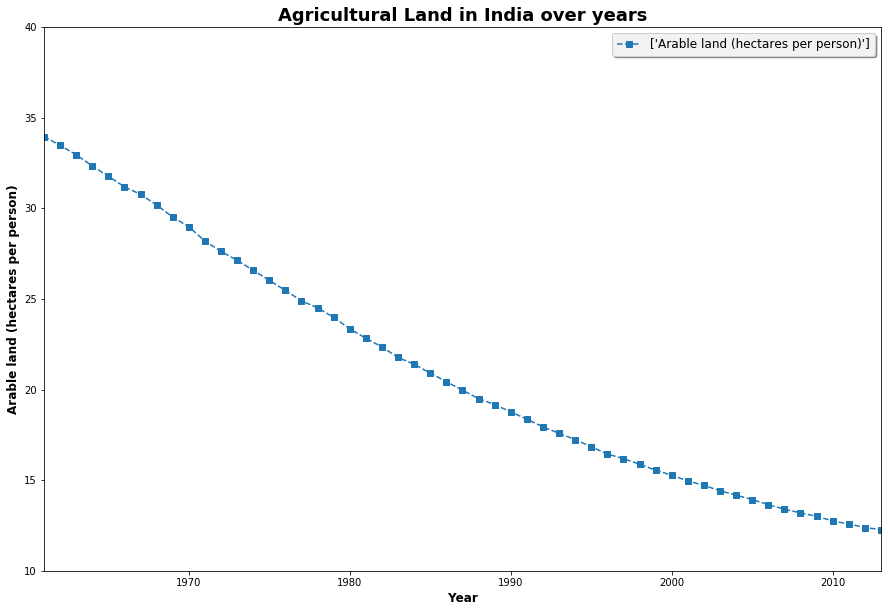

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))

ax.set_ylim(min(0,stage['Value'].min()), 2*stage['Value'].max())
ax.set_title('Agricultural Land in India over years', fontdict={'fontweight':'bold', 'fontsize': 18})
ax.plot(stage['Year'], stage['Value'] , 's--', label=stage['IndicatorName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper right', 
                    shadow=True,
                    prop={'weight':'roman','size':'large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('0.95')
plt.xlabel('Year',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('Arable land (hectares per person)',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.axis([1961, 2013, 10, 40])
plt.show()

In [30]:
#Filtering the % Annual growth in Agriculture over the years in India
hist_indicator2 = 'Agriculture, value added \(annual \% growth\)'
hist_country2 = 'India'

mask11 = data['IndicatorName'].str.contains(hist_indicator2) 
mask22 = data['CountryName'].str.contains(hist_country2)

stage2 = data[mask11 & mask22]
stage2.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36496,India,IND,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,1961,0.084207
64031,India,IND,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,1962,-1.989099
92475,India,IND,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,1963,2.339252
121272,India,IND,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,1964,9.224275
151942,India,IND,"Agriculture, value added (annual % growth)",NV.AGR.TOTL.KD.ZG,1965,-11.042197


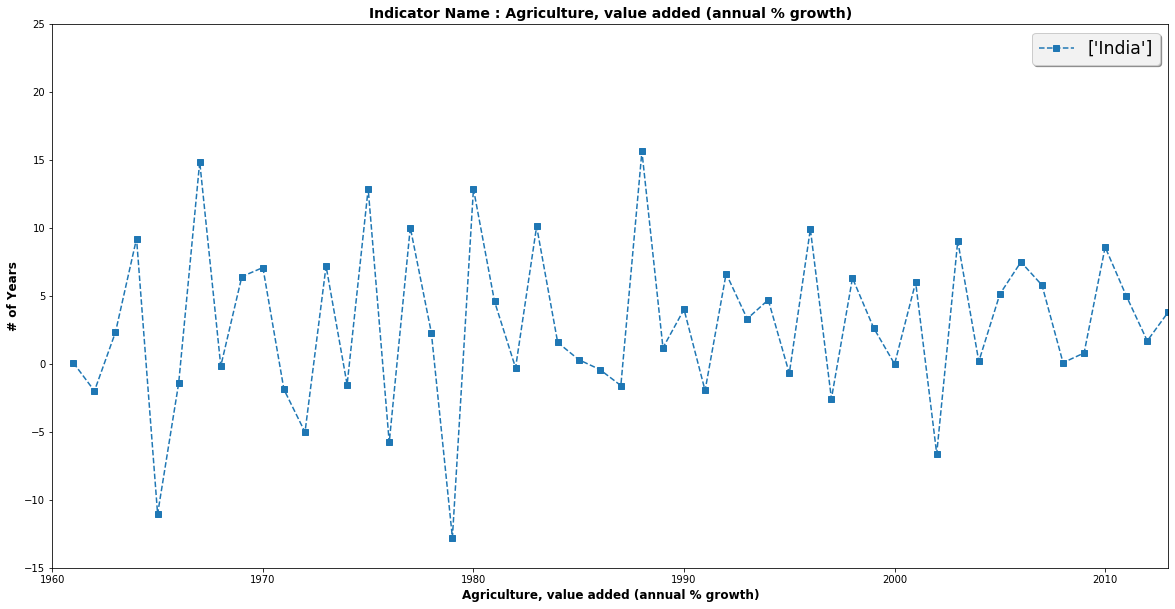

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,stage2['Value'].min()), 2*stage2['Value'].max())
ax.set_title('Indicator Name : ' + stage2['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 14})
ax.plot(stage2['Year'], stage2['Value'] , 's--', label=stage2['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper right', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('0.95')
plt.xlabel(stage2['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('# of Years',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.axis([1960, 2013,-15,25])
plt.show()

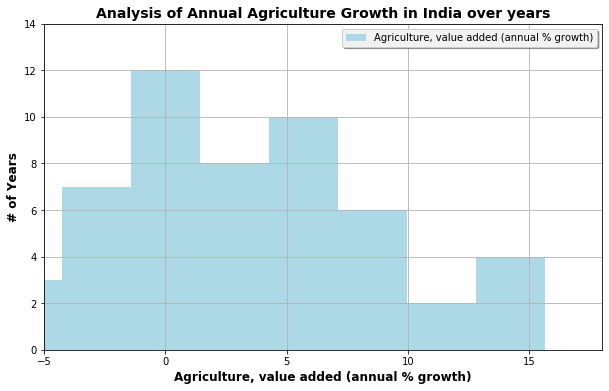

In [71]:

fig, ax = plt.subplots(figsize=(10, 6))

hist_data = stage2['Value'].values

plt.hist(hist_data, 10, density=False, facecolor='lightblue',label=stage2['IndicatorName'].unique())

plt.xlabel(stage2['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('# of Years',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.title('Analysis of Annual Agriculture Growth in India over years',fontdict={'fontweight':'bold', 'fontsize': 14})
# Add the legend
legend = plt.legend(loc = 'upper right', 
                    shadow=True,
                    prop={'weight':'roman','size':'medium'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('0.95')
plt.grid(True)
plt.axis([-5,18,0,14])
plt.show()

In [72]:
# selecting Food production index  for India
fpi_india = 'Food production index \(2004\-2006 \= 100\)'
hist_country6 = 'India'

mask16 = data['IndicatorName'].str.contains(fpi_india) 
mask26 = data['CountryName'].str.contains(hist_country6)

fpi_stage = data[mask16 & mask26]
fpi_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
36548,India,IND,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,1961,32.17
64086,India,IND,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,1962,31.74
92530,India,IND,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,1963,32.46
121327,India,IND,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,1964,33.29
151999,India,IND,Food production index (2004-2006 = 100),AG.PRD.FOOD.XD,1965,31.73


In [73]:
# selecting Industry Value(% of GDP)  for India
ind_india = 'Industry, value added \(\% of GDP\)'
hist_country7 = 'India'

mask17 = data['IndicatorName'].str.contains(ind_india) 
mask27 = data['CountryName'].str.contains(hist_country7)


ind_stage = data[mask17 & mask27]
ind_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11675,India,IND,"Industry, value added (% of GDP)",NV.IND.TOTL.ZS,1960,19.299581
36623,India,IND,"Industry, value added (% of GDP)",NV.IND.TOTL.ZS,1961,19.933228
64165,India,IND,"Industry, value added (% of GDP)",NV.IND.TOTL.ZS,1962,20.608290
92610,India,IND,"Industry, value added (% of GDP)",NV.IND.TOTL.ZS,1963,20.543741
121407,India,IND,"Industry, value added (% of GDP)",NV.IND.TOTL.ZS,1964,19.638801


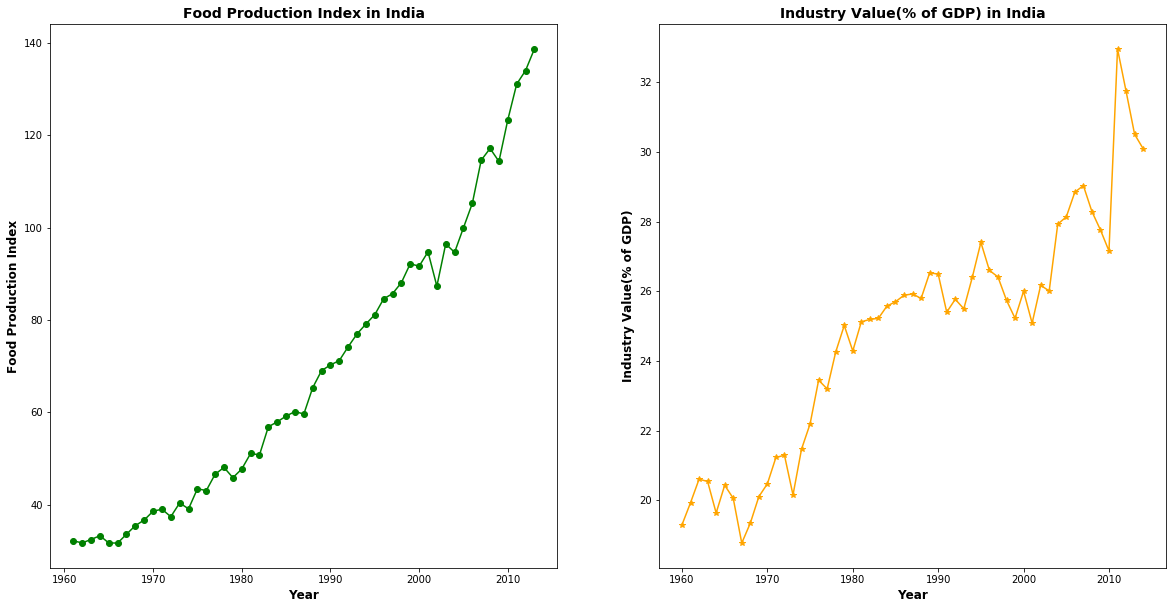

In [88]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot( 'Year', 'Value', data=fpi_stage, marker='o', color="green")
plt.xlabel('Year',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('Food Production Index',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.title("Food Production Index in India",fontdict={'fontweight':'bold', 'fontsize': 14})


plt.subplot(122)
plt.plot( 'Year', 'Value', data=ind_stage, marker='*', color="orange")
plt.xlabel('Year',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('Industry Value(% of GDP)',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.title("Industry Value(% of GDP) in India",fontdict={'fontweight':'bold', 'fontsize': 14})

plt.show()

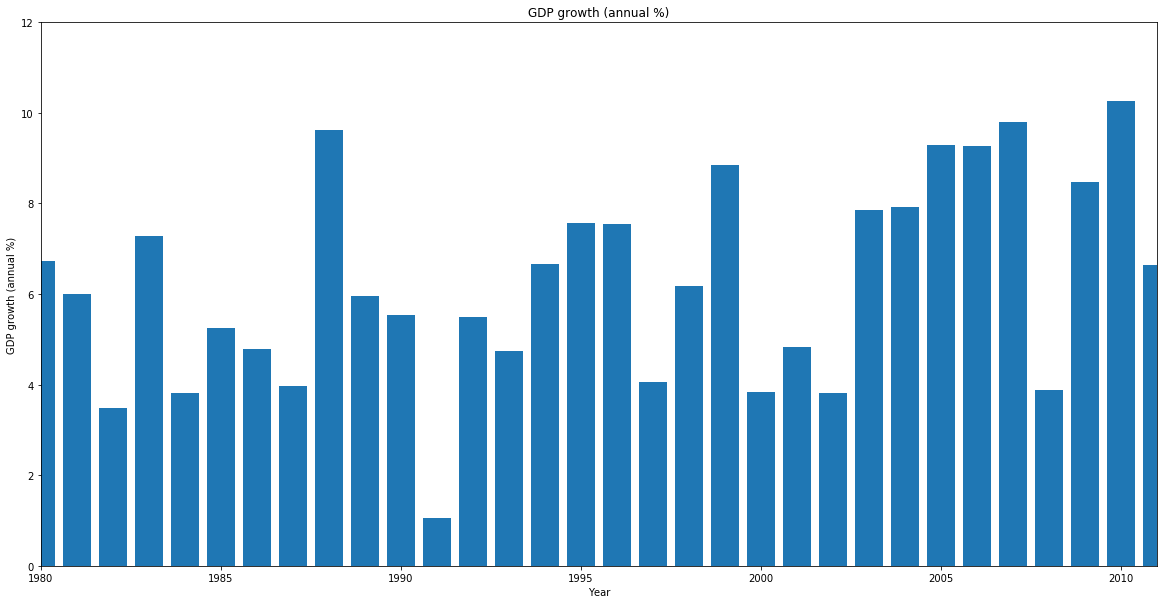

In [89]:
#Land under cereal production (hectares)
# select GDP Per capita emissions for the United States
gdp_india = 'GDP growth \(annual \%\)'
hist_country = 'India'

masked1 = data['IndicatorName'].str.contains(gdp_india) 
masked2= data['CountryName'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[masked1 & masked2]
gdp_stage.head()

#plot gdp_stage vs stage

# switch to a line plot
plt.figure(figsize=(15,10))
plt.bar(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title(gdp_stage['IndicatorName'].iloc[0])

# to make more honest, start they y axis at 0GDP per capita growth \(annual \%\)
plt.axis([1980, 2011, 0, 12])

plt.show()

In [90]:
gdp_us = 'GDP growth \(annual \%\)'
hist_countr = 'USA'

masked11 = data['IndicatorName'].str.contains(gdp_us) 
masked22= data['CountryCode'].str.contains(hist_countr)

gdp_stage_us = data[masked11 & masked22]
gdp_stage_us.head()


gdp_ch = 'GDP growth \(annual \%\)'
hist_count = 'CHN'

masked13 = data['IndicatorName'].str.contains(gdp_ch) 
masked23= data['CountryCode'].str.contains(hist_count)

gdp_stage_ch = data[masked13 & masked23]
gdp_stage_ch.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4893516,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2010,10.631708
5077102,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2011,9.484506
5252854,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2012,7.750298
5422912,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2013,7.683810
5564395,China,CHN,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2014,7.268461


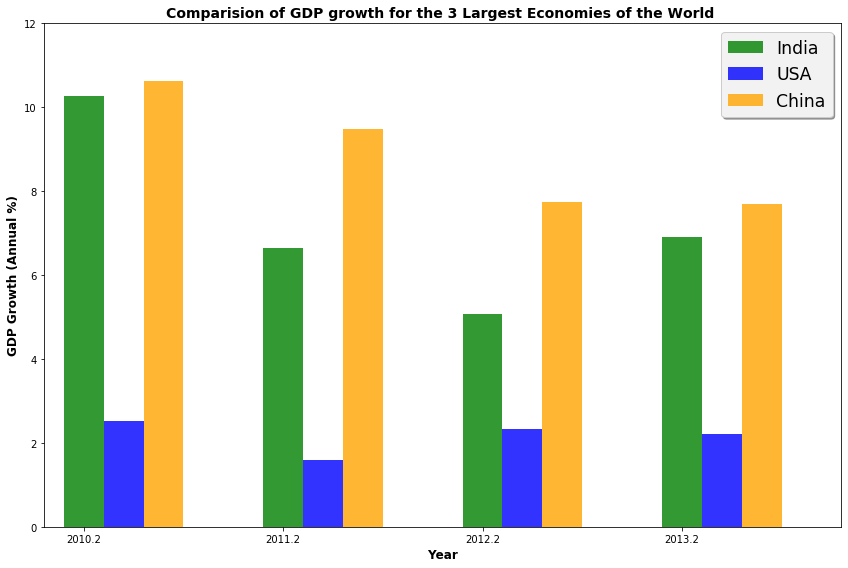

In [99]:
import numpy as np
import matplotlib.pyplot as plt

n_groups = 4


# create plot
plt.figure(figsize=(12,8))

index = np.all(gdp_stage['Year'])

bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(gdp_stage['Year'].values + bar_width, gdp_stage['Value'].values, bar_width,alpha=opacity,color='green',label='India')

rects2 = plt.bar(gdp_stage_us['Year'].values + bar_width*2, gdp_stage_us['Value'].values, bar_width,alpha=opacity,color='blue',label='USA')

rects3 = plt.bar(gdp_stage_ch['Year'].values + bar_width*3, gdp_stage_ch['Value'].values, bar_width,alpha=opacity,color='orange',label='China')

plt.xlabel('Year',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.ylabel('GDP Growth (Annual %)',fontdict={'fontweight':'bold', 'fontsize': 12})
plt.title('Comparision of GDP growth for the 3 Largest Economies of the World ',fontdict={'fontweight':'bold', 'fontsize': 14})
plt.xticks(gdp_stage['Year'] + bar_width)
legend=plt.legend(loc = 'upper right', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('0.95')

plt.tight_layout()
plt.axis([2010, 2014, 0, 12])
plt.show()

In [100]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] > 1961]
ind_stage_trunc = ind_stage[ind_stage['Year'] > 1961]
#lnd_stage_trunc = lnd_stage[lnd_stage['Year'] > 1960]
stage_trunc = stage[stage['Year'] > 1960]
stage2_trunc = stage2[stage2['Year'] > 1961]
fpi_stage_trunc = fpi_stage[fpi_stage['Year'] > 1960]
print(len(fpi_stage_trunc))
print(len(stage2_trunc))
print(len(gdp_stage_trunc))
print(len(stage_trunc))
#print(len(lnd_stage_trunc))
print(len(ind_stage_trunc))

53
53
53
53
53


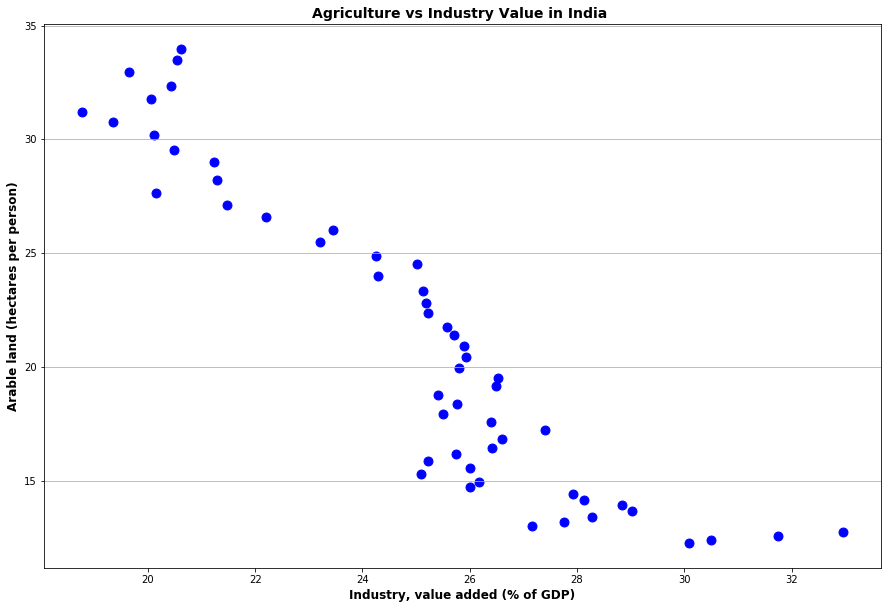

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10))
fig, axis = plt.subplots(figsize=(15, 10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Agriculture vs Industry Value in India ',fontdict={'fontweight':'bold', 'fontsize': 14})
axis.set_xlabel(ind_stage_trunc['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
axis.set_ylabel(stage_trunc['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
#axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)

#X = gdp_stage_trunc['Value']
Y = stage_trunc['Value']
X = ind_stage_trunc['Value']

axis.scatter(X, Y, s=80, c='b', marker='o')
#plt.axis([0, 10, -10, 20])
plt.show()

In [118]:
np.corrcoef(ind_stage_trunc['Value'],stage_trunc['Value'])

array([[ 1.        , -0.92532957],
       [-0.92532957,  1.        ]])

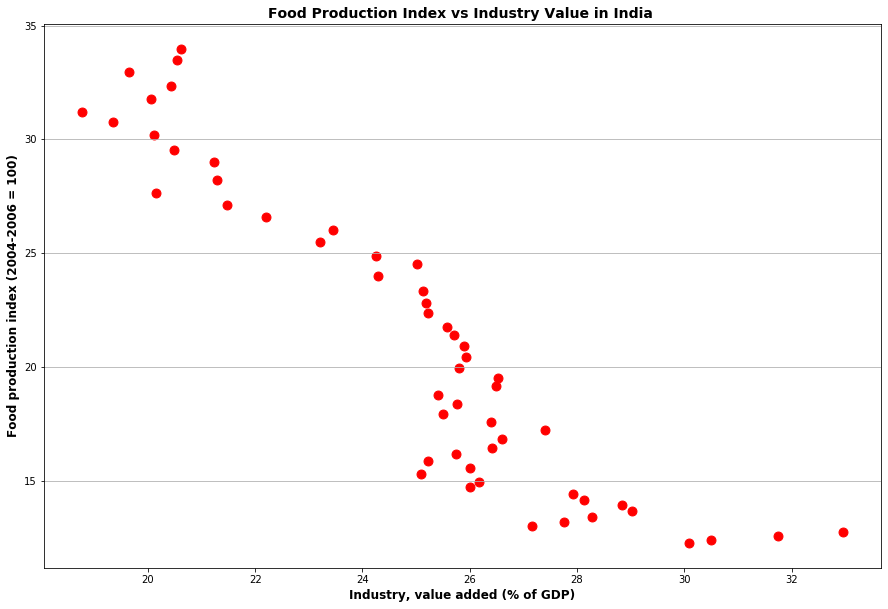

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10))
fig, axis = plt.subplots(figsize=(15, 10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Food Production Index vs Industry Value in India ',fontdict={'fontweight':'bold', 'fontsize': 14})
axis.set_xlabel(ind_stage_trunc['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
axis.set_ylabel(fpi_stage_trunc['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
#axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)

#X = gdp_stage_trunc['Value']
Y = stage_trunc['Value']
X = ind_stage_trunc['Value']

axis.scatter(X, Y, s=80, c='red', marker='o')
#plt.axis([0, 10, -10, 20])
plt.show()

In [126]:
np.corrcoef(ind_stage_trunc['Value'],fpi_stage_trunc['Value'])

array([[1.        , 0.89803935],
       [0.89803935, 1.        ]])

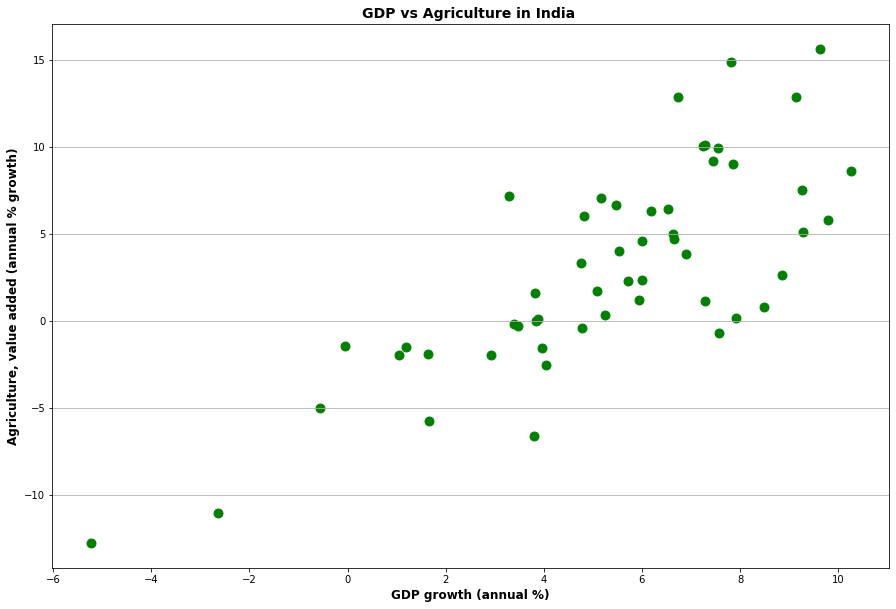

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure(figsize=(20,10))
fig, axis = plt.subplots(figsize=(15, 10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('GDP vs Agriculture in India ',fontdict={'fontweight':'bold', 'fontsize': 14})
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
axis.set_ylabel(stage2_trunc['IndicatorName'].iloc[0],fontdict={'fontweight':'bold', 'fontsize': 12})
#axis.set_xlabel(stage_trunc['IndicatorName'].iloc[0],fontsize=10)

#X = gdp_stage_trunc['Value']
Y = stage2_trunc['Value']
X = gdp_stage_trunc['Value']

axis.scatter(X, Y, s=80, c='green', marker='o')
#plt.axis([0, 10, -10, 20])
plt.show()

In [124]:
np.corrcoef(gdp_stage_trunc['Value'],stage2_trunc['Value'])

array([[1.       , 0.7760216],
       [0.7760216, 1.       ]])

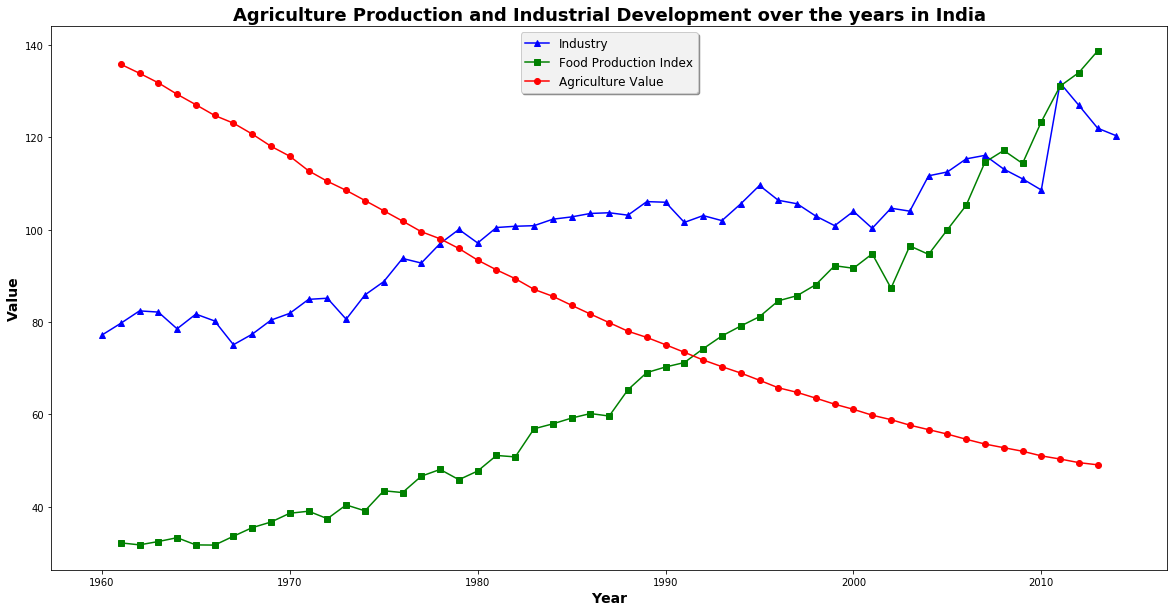

In [144]:

plt.figure(figsize=(20,10),facecolor="white")
plt.title('Agriculture Production and Industrial Development over the years in India', fontdict={'fontweight':'bold', 'fontsize': 18})
#ax = plt.axes()
# Setting the background color


plt.plot(ind_stage.Year, ind_stage.Value*4, 'b^-', label='Industry')
plt.plot(fpi_stage.Year,fpi_stage.Value, 'gs-', label='Food Production Index')
plt.plot(stage.Year,stage.Value*4, 'ro-', label='Agriculture Value')
#plt.plot(gdp_stage.Year,gdp_stage.Value*10, 'b.-', label='GDp')


plt.xlabel('Year',fontdict={'fontweight':'bold', 'fontsize': 14})
plt.ylabel('Value',fontdict={'fontweight':'bold', 'fontsize': 14})
legend=plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('0.95')
#plt.legend()
#plt.axis([1961, 2013,15,40])
#plt.savefig('Gas_price_figure.png', dpi=300)
#plt.set_axis_bgcolor("lightslategray")
plt.show()

In [145]:
import folium
import pandas as pd

In [146]:
country_geo = r'C:\Users\user\Downloads\world-countries\world-countries.json'

In [181]:
hist_inag = 'Urban population growth \(annual \%\)'
hist_year = 2011

maskag1 = data['IndicatorName'].str.contains(hist_inag) 
maskag2 = data['Year'].isin([hist_year])

# apply our mask
stageag = data[maskag1 & maskag2]
stageag

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026739,Arab World,ARB,Urban population growth (annual %),SP.URB.GROW,2011,2.846999
5027232,Caribbean small states,CSS,Urban population growth (annual %),SP.URB.GROW,2011,0.741781
5027808,Central Europe and the Baltics,CEB,Urban population growth (annual %),SP.URB.GROW,2011,-0.289307
5028385,East Asia & Pacific (all income levels),EAS,Urban population growth (annual %),SP.URB.GROW,2011,2.650938
5029168,East Asia & Pacific (developing only),EAP,Urban population growth (annual %),SP.URB.GROW,2011,3.030440
...,...,...,...,...,...,...
5199268,Virgin Islands (U.S.),VIR,Urban population growth (annual %),SP.URB.GROW,2011,-0.279932
5199861,West Bank and Gaza,WBG,Urban population growth (annual %),SP.URB.GROW,2011,3.293334
5200591,"Yemen, Rep.",YEM,Urban population growth (annual %),SP.URB.GROW,2011,4.469232
5201460,Zambia,ZMB,Urban population growth (annual %),SP.URB.GROW,2011,4.114779


In [221]:
plot_data = stageag[['CountryCode','Value']]
plot_data.head()
plot_data.shape
hist_inag= stageag.iloc[0]['IndicatorName']

In [222]:
map = folium.Map(location=[100, 0], zoom_start=1.5)

In [223]:

folium.Choropleth(geo_data=country_geo, data=plot_data,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             nan_fill_color='skyblue',
             nan_fill_opacity=0.5,
             fill_color='BuPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_inag).add_to(map)

In [224]:
map.save('plot_data3.html')

In [225]:
from IPython.display import HTML
HTML('<iframe src=plot_data3.html width=900 height=450></iframe>')

In [227]:
hist_indicatorwm = 'Agriculture, value added \(\% of GDP\)'
hist_year = 2011

mask1wm = data['IndicatorName'].str.contains(hist_indicatorwm) 
mask2wm = data['Year'].isin([hist_year])

# apply our mask
stagewm = data[mask1wm & mask2wm]
stagewm

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026244,Arab World,ARB,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,6.064115
5026759,Caribbean small states,CSS,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,3.848942
5027262,Central Europe and the Baltics,CEB,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,3.888161
5027841,East Asia & Pacific (all income levels),EAS,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,4.124753
5028416,East Asia & Pacific (developing only),EAP,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,10.474334
...,...,...,...,...,...,...
5197620,"Venezuela, RB",VEN,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,5.432204
5198373,Vietnam,VNM,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,20.079457
5199294,West Bank and Gaza,WBG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,6.887994
5200626,Zambia,ZMB,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,2011,10.196866


In [228]:
plot_data = stagewm[['CountryCode','Value']]
plot_data.head()
plot_data.shape

(206, 2)

In [229]:
hist_indicatorwm = stagewm.iloc[0]['IndicatorName']

In [230]:
map = folium.Map(location=[100, 0], zoom_start=1.5)

In [231]:
folium.Choropleth(geo_data=country_geo, data=plot_data,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             nan_fill_color='lightyellow',
             nan_fill_opacity=0.5,
             fill_color='RdPu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=hist_indicatorwm).add_to(map)

In [232]:
map.save('plot_data.html')

In [233]:
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=900 height=450></iframe>')